# <span style="background-color:yellow">  Zomato Delivery Data Analysis  

Author: Pratyakshkumar Parmar<br>
Time : October, 2023.




**Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This dataset in not encoded using UTF-8.<br> So that, we need to use encoding with latin-1

In [2]:
# Load the dataset

df = pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking columns in dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
# Getting information about data types, Columns, Missing Values and Memory Usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Getting basic description to know more about data.  Basically shows numerical columns.

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Missing Values**

In [6]:
# Checking whether dataset has missing values

[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

Getting another dataset Country Code

In [7]:
df_country_code = pd.read_excel('Country-Code.xlsx')
df_country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


we have similar column name Country code which is common in both. We can Merge both dataset.

In [8]:
new_df = pd.merge(df,df_country_code,how='left',on='Country Code')
new_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [9]:
# Getting number of rows and columns
new_df.shape

(9551, 22)

In [10]:
# Getting Catagorical and Numerical columns separately

num_columns = new_df.describe().columns
cat_columns = new_df.describe(include='object').columns

print(num_columns)
print("\n"*2)
print(cat_columns)



Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')



Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')


# Getting Observations with Visualisation

1) Find Countries with Highest & Lowest Orders vs Rating Category <br>
2) Find Top 5 Cuisines with Highest Orders<br>
3) Find Top 5 & Worst 5 Cuisines<br>


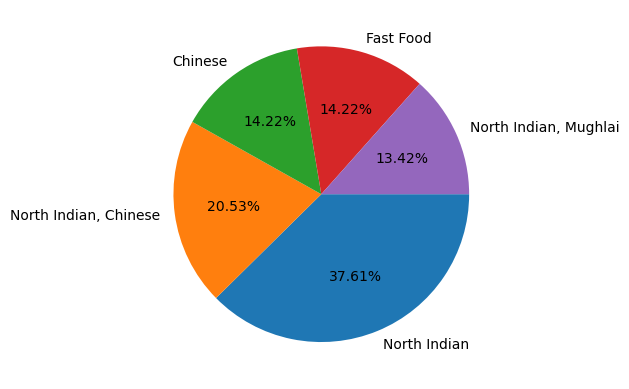

In [11]:
# Let's draw Pie Chart

plt.pie(labels = new_df.Cuisines.value_counts().index[:5],x=new_df.Cuisines.value_counts().values[:5],autopct='%1.2F%%', counterclock=False)
plt.show()

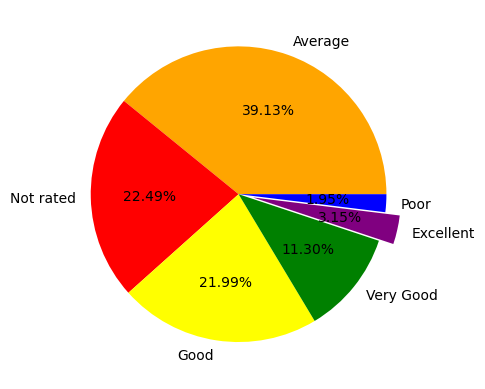

In [12]:
explode = (0, 0, 0, 0,0.10,0)

colors = ['Orange','red','yellow','green','Purple','blue']

rating_pie = plt.pie(x=new_df['Rating text'].value_counts().values,labels=new_df['Rating text'].value_counts().index,autopct='%1.2f%%',counterclock=True,explode=explode,colors=colors)

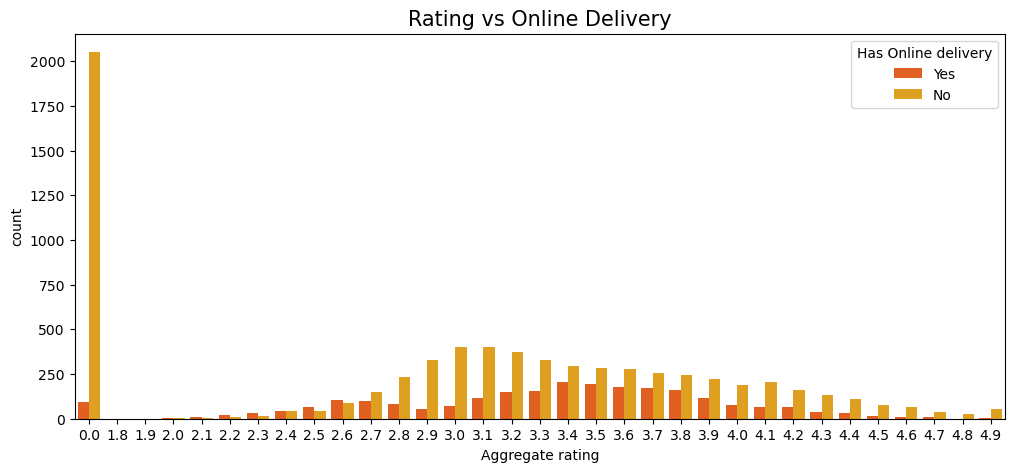

In [13]:
plt.figure(figsize=(12,5))

plt.title("Rating vs Online Delivery",fontsize=15)

sns.countplot(x=new_df['Aggregate rating'],hue =new_df['Has Online delivery'],hue_order=['Yes','No'], data=new_df,palette='autumn')

plt.show()

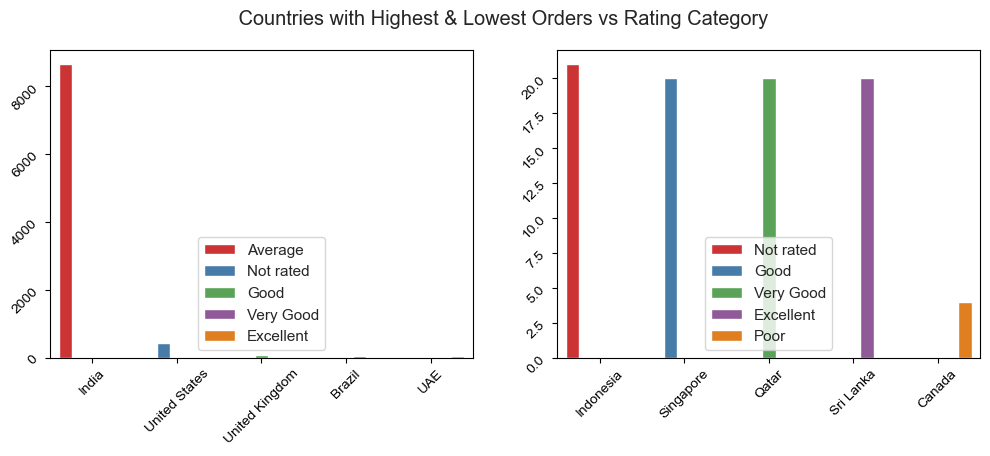

In [14]:
fig,axes = plt.subplots(1,2,figsize=(12,4),squeeze=False)

sns.set(style='whitegrid')

plt.suptitle(" Countries with Highest & Lowest Orders vs Rating Category")

sns.barplot(ax = axes[0,0],x=new_df.Country.value_counts().index[:5],y =new_df.Country.value_counts().values[:5],hue=new_df['Rating text'].value_counts().index[:5], data = new_df, palette="Set1")

sns.barplot(ax = axes[0,1],x=new_df.Country.value_counts().index[-5:],y =new_df.Country.value_counts().values[-5:],hue=new_df['Rating text'].value_counts().index[-5:], data = new_df, palette="Set1")

axes[0][0].tick_params(labelrotation=45);

axes[0][1].tick_params(labelrotation=45);

plt.show()

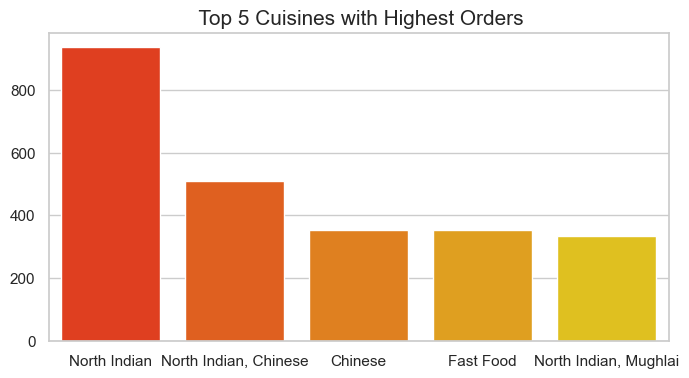

In [15]:
plt.figure(figsize=(8,4))

plt.title(" Top 5 Cuisines with Highest Orders",fontsize=15)

sns.set(style='whitegrid')

sns.barplot(x=new_df.Cuisines.value_counts().index[:5],y =new_df.Cuisines.value_counts().values[:5], data = new_df, palette="autumn")

plt.show()

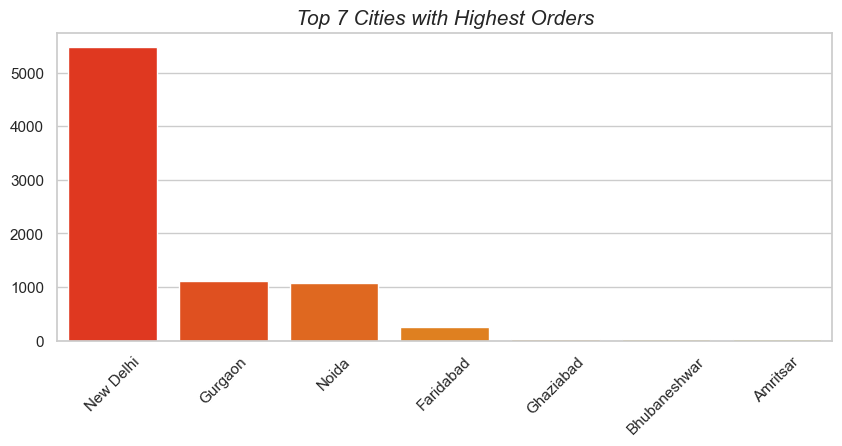

In [16]:
plt.figure(figsize=(10,4))

plt.title("Top 7 Cities with Highest Orders",fontsize=15,fontstyle='italic')

sns.set(style='whitegrid')

ax1 = sns.barplot(x=new_df.City.value_counts().index[:7],y =new_df.City.value_counts().values[:7], data = new_df, palette="autumn")

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

plt.show(ax1)

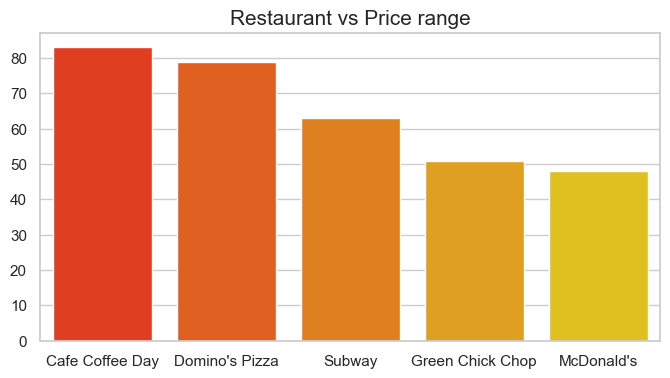

In [17]:
plt.figure(figsize=(8,4))

plt.title("Restaurant vs Price range",fontsize=15)

sns.set(style='whitegrid')

sns.barplot(x=new_df['Restaurant Name'].value_counts().index[:5],y =new_df['Restaurant Name'].value_counts().values[:5], data = new_df, palette="autumn",)

plt.show()

In [18]:
new_df.groupby(['Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Rating color,Rating text,Rating Count
0,Dark Green,Excellent,301
1,Green,Very Good,1079
2,Orange,Average,3737
3,Red,Poor,186
4,White,Not rated,2148
5,Yellow,Good,2100


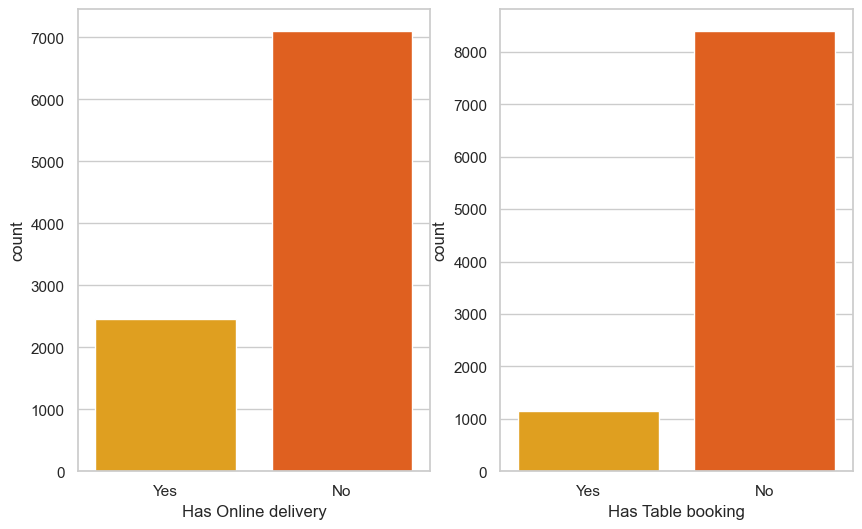

In [19]:
fig,axes = plt.subplots(1,2,figsize=(10,6),squeeze=False)


sns.countplot(ax=axes[0,0],x=new_df['Has Online delivery'],order = ['Yes','No'],data=new_df,palette='autumn_r')

sns.countplot(ax=axes[0,1],x=new_df['Has Table booking'],order = ['Yes','No'],data=new_df,palette='autumn_r') 

plt.show()
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)     ,hue=new_df['Has Table booking']

<AxesSubplot:xlabel='Has Online delivery', ylabel='Price range'>

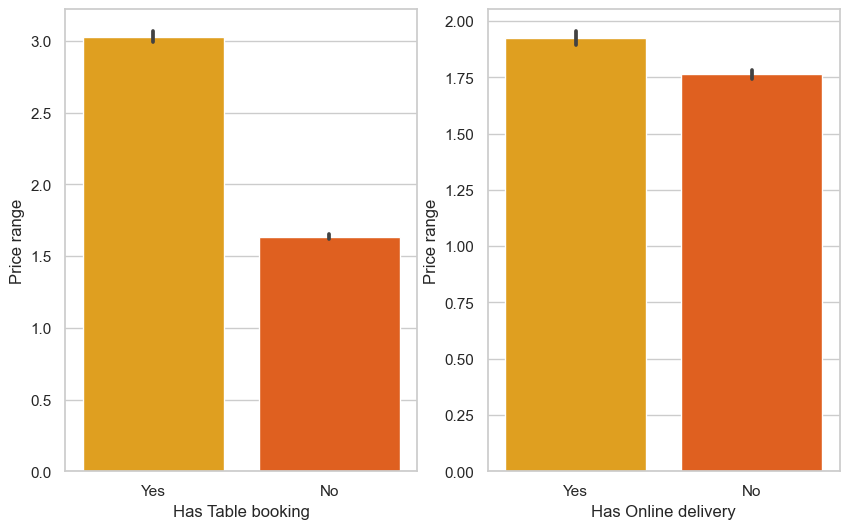

In [21]:
fig,axes = plt.subplots(1,2,figsize=(10,6),squeeze=False)


sns.barplot(ax=axes[0,0],y=new_df['Price range'],x=new_df['Has Table booking'],order = ['Yes','No'],data=new_df,palette='autumn_r')
sns.barplot(ax=axes[0,1],y=new_df['Price range'],x=new_df['Has Online delivery'],order = ['Yes','No'],data=new_df,palette='autumn_r')

## Observations

<span style="background-color:yellow">    
1) With Highest Numbers of Orders, India is occupying around 94.39 % of Worle-wide Ratio.<br><br> 

<span style="background-color:yellow">
2) Top 5 Highest Ordered Cuisines: <br><br>
North Indian    =                  936 <br>
North Indian, Chinese   =          511 <br>
Chinese     =                      354 <br>
Fast Food    =                     354 <br>
North Indian, Mughlai    =         334 <br>
<br><br>     
3) Top 7 Cities with Highest Orders:<br> <br>
New Delhi =       5473 <br> 
Gurgaon  =       1118 <br> 
Noida  =         1080 <br> 
Faridabad   =     251 <br> 
Ghaziabad  =       25 <br><br>
<span style="background-color:yellow">
4) There are ~7000 Restaurants don't have Online delivery.<br>
Around ~2400 have Online Delivery<br> <br>
<span style="background-color:yellow">
5) Around ~ 8000 Restaurants don't have Table booking.<br>
While,~100 have Table booking.<br><br>
6) Price range is nearly Double which provides Table Booking(~3) compared to Non Booking(~1.5).<br><br>

